In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
#If you want the Keras modules you write to be compatible with both 
#Theano (th) and TensorFlow (tf), you have to write them via the abstract Keras backend API.
from keras import backend as K
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import AveragePooling2D, GlobalAveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras.models import Model
#Till we have more data, we use ceil() at validation steps
#import math

Using TensorFlow backend.


In [2]:
image_path="data"
IMG_SIZE=100

#https://keras.io/preprocessing/image/#imagedatagenerator-class
data_generator=ImageDataGenerator(validation_split=0.2)

train_data = data_generator.flow_from_directory(image_path,target_size=(100,100), color_mode='rgb', batch_size=10, subset='training')
valid_data = data_generator.flow_from_directory(image_path,target_size=(100,100), color_mode='rgb', batch_size=10, subset='validation')

STEP_SIZE = train_data.n//train_data.batch_size
VALIDATION_STEPS = valid_data.n // valid_data.batch_size

print("Classes : ",train_data.class_indices)
print("VALIDATION_STEPS : ",VALIDATION_STEPS)

Found 1087 images belonging to 2 classes.
Found 270 images belonging to 2 classes.
Classes :  {'Face_Images': 0, 'Mobile_Images': 1}
VALIDATION_STEPS :  27


In [26]:
base_model=ResNet50(include_top=False, weights='imagenet', input_shape=(100,100,3), classes=2)
x=base_model.output
x=GlobalAveragePooling2D()(x)

#we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x)
x=Dense(512,activation='relu')(x)
preds=Dense(2,activation='softmax')(x)
model=Model(inputs=base_model.input,outputs=preds)

print(len(model.layers))

179


In [28]:
for layer in model.layers[:23]:
    layer.trainable=False
for layer in model.layers[23:]:
    layer.trainable=True
    
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
history = model.fit_generator(generator=train_data,
                   steps_per_epoch=STEP_SIZE,
                   validation_data=valid_data,
                   validation_steps=VALIDATION_STEPS,
                   epochs=20)

print(history.history.keys())

Epoch 1/20
108/108 [==============================] - 38s 356ms/step - loss: 0.0936 - acc: 0.9769 - val_loss: 1.2163 - val_acc: 0.9074
Epoch 2/20
108/108 [==============================] - 11s 106ms/step - loss: 0.0717 - acc: 0.9806 - val_loss: 1.3815 - val_acc: 0.8778
Epoch 3/20
108/108 [==============================] - 11s 106ms/step - loss: 0.0655 - acc: 0.9769 - val_loss: 0.2513 - val_acc: 0.9333
Epoch 4/20
108/108 [==============================] - 11s 106ms/step - loss: 0.0488 - acc: 0.9870 - val_loss: 0.3460 - val_acc: 0.9148
Epoch 5/20
108/108 [==============================] - 11s 105ms/step - loss: 0.0495 - acc: 0.9898 - val_loss: 2.1727 - val_acc: 0.8333
Epoch 6/20
108/108 [==============================] - 11s 106ms/step - loss: 0.1033 - acc: 0.9741 - val_loss: 2.7793 - val_acc: 0.7519
Epoch 7/20
108/108 [==============================] - 11s 105ms/step - loss: 0.0746 - acc: 0.9806 - val_loss: 0.1119 - val_acc: 0.9333
Epoch 8/20
108/108 [==============================] - 1

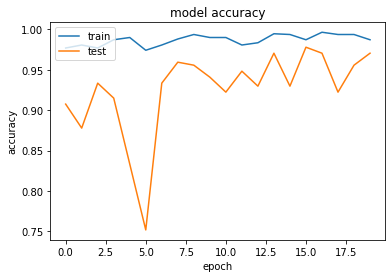

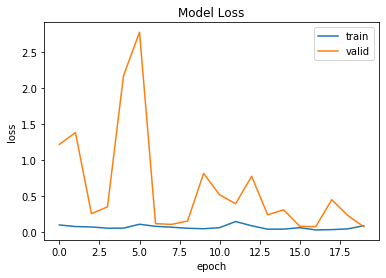

In [29]:
#Plotting graphs for better viewing the model
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [31]:
model.save("resnet.h5")
#model.save_weights('my_model_weights.h5')
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 106, 106, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 50, 50, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 50, 50, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [32]:
from keras.preprocessing import image
import numpy as np
import keras

#grayscale=True can also be passed
test_image = image.load_img("sida.jpeg",color_mode='rgb', target_size = (100, 100)) 
test_image = image.img_to_array(test_image)
#predict expects an array of images.
test_image = np.expand_dims(test_image, axis = 0)

p=model.predict(test_image)
print("The predicted array is :",p)
print("The prediction index is :",p.argmax(axis=-1))
#print("The predicted class is :",keras.np_utils.probas_to_classes(p))

The predicted array is : [[0.9288422  0.07115777]]
The prediction index is : [0]


In [ ]:
from keras import metrics
cm = metrics.confusion_matrix(train_data.classes, y_pred)
# or
#cm = np.array([[1401,    0],[1112, 0]])

plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()